In [18]:
import numpy as py
import pandas as pd
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
clf1=LinearSVC()

In [19]:
x=pd.read_csv("C:/Users/anitr/DataProcessing/Digit Recognizer/digits/train.csv")
y=pd.read_csv("C:/Users/anitr/DataProcessing/Digit Recognizer/digits/test.csv")

In [20]:
print(x.head())
print(y.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [21]:
print(x.tail())
print(y.tail())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
41995       0    ...            0         0         0         0         0   
41996       0    ...            0         0         0         0         0   
41997       0    ...            0         0         0         0         0   
41998       0    ...            0         0         0         0         0   
41999       0    ...            0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783 

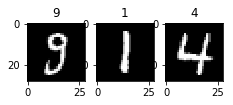

In [22]:
train_features,train_labels = x.drop("label",axis=1).values.astype('float32'),x["label"].values.astype('int32') 
import random
train_features_images=train_features.reshape(train_features.shape[0],28,28)


def show_images(features_images,labels,length):
    start=40
    for i in range(start, start+length):
        plt.subplot(110 + (i+1))
        plt.imshow(features_images[i], cmap=plt.get_cmap('gray'))
        plt.title(labels[i])
    plt.show()
        
show_images(train_features_images,train_labels,3)

In [23]:
train_data=pd.DataFrame(x)
test_data=pd.DataFrame(y)

In [24]:
dtrainx=train_data.iloc[:,1:]
dtrainy=train_data.iloc[:,0:1]

In [25]:
print(dtrainx.tail())
print(dtrainy.tail())

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
41995       0    ...            0         0         0         0         0   
41996       0    ...            0         0         0         0         0   
41997       0    ...            0         0         0         0         0   
41998       0    ...            0         0         0         0         0   
41999       0    ...            0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pix

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dtrainx, dtrainy, test_size = 0.3, random_state = 1)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400, 1)
(12600, 1)


In [28]:
clf1.fit(x_train,y_train)

C:\Users\anitr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [29]:
print(clf1.intercept_)
print(clf1.coef_)

[-0.01190604 -0.00043502 -0.04173563 -0.06502369 -0.01347617 -0.00036978
 -0.02135485 -0.00855729 -0.16449135 -0.0764599 ]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
pred=clf1.predict(x_test)
pred=(py.around(pred,decimals=0))
pred=pd.DataFrame(pred)
pred

,0
0,1
1,5
2,2
3,8
4,4
5,4
6,0
7,5
8,4
9,8


In [31]:
print(pred.shape)
print(y_test.shape)

(12600, 1)
(12600, 1)


Text(0,0.5,'Digit')

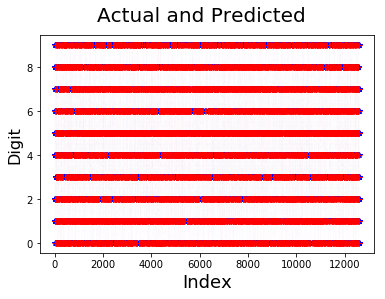

In [32]:
c = [i for i in range(0,12600,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=0.001, marker="*")
plt.plot(c,pred, color="red",  linewidth=0.001, marker="+")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Digit', fontsize=16) 

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.8277777777777777

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred)
r_squared = r2_score(y_test, pred)

In [35]:
print('Mean Squared Error :' ,mse)
print('r_square_value :',r_squared)
print('RMSE :',py.sqrt(mean_squared_error(y_test,pred)))

Mean Squared Error : 2.306904761904762
r_square_value : 0.7234320619734943
RMSE : 1.5188498154540369


In [36]:
pred1=clf1.predict(test_data)
pred1 = pd.DataFrame(pred1)
pred1=py.around(pred1,decimals=0)
pred1

,0
0,2
1,0
2,5
3,7
4,2
5,7
6,0
7,3
8,0
9,3


In [37]:
pred1.to_csv("C:/Users/anitr/DataProcessing/Digit Recognizer/digits/final_submission.csv")